In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from pathlib import Path

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#create pathlib for path
tr_path = Path('/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training')
ts_path = Path('/kaggle/input/fruits/fruits-360_dataset/fruits-360/Test')

In [3]:
#Getting Image Paths
tr_img_paths = list(tr_path.glob("*/*"))
tr_img_paths = list(map(lambda x : str(x), tr_img_paths))

tr_img_paths[:10]

['/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Quince/r_305_100.jpg',
 '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Quince/139_100.jpg',
 '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Quince/128_100.jpg',
 '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Quince/r_239_100.jpg',
 '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Quince/185_100.jpg',
 '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Quince/r_199_100.jpg',
 '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Quince/r_287_100.jpg',
 '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Quince/73_100.jpg',
 '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Quince/191_100.jpg',
 '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Quince/r_306_100.jpg']

In [4]:
# Getting their respective labels

def get_label(image_path):
    return image_path.split("/")[-2]

tr_img_labels = list(map(lambda x : get_label(x), tr_img_paths))
tr_img_labels[:10]

['Quince',
 'Quince',
 'Quince',
 'Quince',
 'Quince',
 'Quince',
 'Quince',
 'Quince',
 'Quince',
 'Quince']

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
tr_img_labels = le.fit_transform(tr_img_labels)

tr_img_labels[:10]

array([111, 111, 111, 111, 111, 111, 111, 111, 111, 111])

In [6]:
import tensorflow as tf

tr_img_labels = tf.keras.utils.to_categorical(tr_img_labels)

tr_img_labels[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
from sklearn.model_selection import train_test_split

Tr_paths, Val_paths, Tr_labels, Val_label = train_test_split(tr_img_paths, tr_img_labels)

In [8]:
Tr_paths[:10], Tr_labels[:10]

(['/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Plum 3/r2_200_100.jpg',
  '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Potato White/r_24_100.jpg',
  '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Tomato 2/69_100.jpg',
  '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Cherry Wax Red/184_100.jpg',
  '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Cherry Wax Red/320_100.jpg',
  '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Banana Lady Finger/159_100.jpg',
  '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Pear Monster/r_296_100.jpg',
  '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Lemon/r_93_100.jpg',
  '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Pear 2/r_223_100.jpg',
  '/kaggle/input/fruits/fruits-360_dataset/fruits-360/Training/Cherry Wax Black/7_100.jpg'],
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ...

In [9]:
# function used for transformation

def load(image, label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image, channels=3)
    return image, label

In [10]:
# Define image size and Batch size
img_size = 224
batch_size = 32

# basic transformation
resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(img_size, img_size)
])

# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor = (-0.3, -0.2))
])

2023-01-16 07:34:30.824025: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-16 07:34:30.824951: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-16 07:34:30.966848: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-16 07:34:30.967731: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-16 07:34:30.968492: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [11]:
# function used to create a tensorflow data object
autotune = tf.data.experimental.AUTOTUNE
def get_dataset(paths, labels, train = True):
    image_paths = tf.convert_to_tensor(paths)
    labels = tf.convert_to_tensor(labels)
    
    image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    label_dataset = tf.data.Dataset.from_tensor_slices(labels)
    
    dataset = tf.data.Dataset.zip((image_dataset, label_dataset))
    
    dataset = dataset.map(lambda image, label: load(image, label))
    dataset = dataset.map(lambda image, label: (resize(image), label), num_parallel_calls=autotune)
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(batch_size)
    
    if train:
        dataset = dataset.map(lambda image, label: (data_augmentation(image), label), num_parallel_calls=autotune)
        
    dataset = dataset.repeat()
    return dataset

In [12]:
# creating train dataset object and verifying it
%time train_dataset = get_dataset(Tr_paths, Tr_labels)

image, label = next(iter(train_dataset))
print(image.shape)
print(label.shape)

CPU times: user 524 ms, sys: 43.4 ms, total: 567 ms
Wall time: 610 ms


2023-01-16 07:34:35.008487: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


(32, 224, 224, 3)
(32, 131)


Cactus fruit


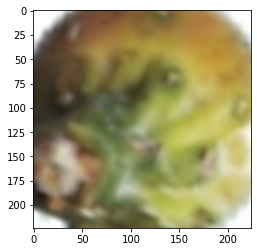

In [13]:
# view a sample training image
print(le.inverse_transform(np.argmax(label, axis=1))[0])
plt.imshow((image[0].numpy()/255).reshape(224,224,3))

In [14]:
%time val_dataset = get_dataset(Val_paths, Val_label, train=False)

image, label = next(iter(val_dataset))
print(image.shape)
print(label.shape)

CPU times: user 32.1 ms, sys: 264 µs, total: 32.4 ms
Wall time: 33.4 ms
(32, 224, 224, 3)
(32, 131)


In [15]:
# building ResNet50 model
# from tensorflow.keras.applications import ResNet50V2

# backbone = ResNet50V2(
#     input_shape=(224,224,3),
#     include_top=False
# )

# model = tf.keras.Sequential([
#     backbone,
#     tf.keras.layers.GlobalAveragePooling2D(),
#     tf.keras.layers.Dense(131, activation='softmax')
# ])

# model.summary()

In [16]:
# building EfficientNetB3 model
from tensorflow.keras.applications import EfficientNetB3

backbone = EfficientNetB3(
    input_shape=(224,224,3),
    include_top=False
)

model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(131, activation='softmax')
])

model.summary()

43950080/43941136 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb3 (Functional)  (None, 7, 7, 1536)        10783535  
_________________________________________________________________
global_average_pooling2d (Gl (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 131)               201347    
Total params: 10,984,882
Trainable params: 10,897,579
Non-trainable params: 87,303
_________________________________________________________________


In [17]:
# compiling your model by providing the optimizer, loss and metrics
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(name='Precision'), tf.keras.metrics.Recall(name='Recall')]
)

In [18]:
#train the model
history = model.fit(
    train_dataset,
    steps_per_epoch=len(Tr_paths)//batch_size,
    epochs=1,
    validation_data=val_dataset,
    validation_steps=len(Val_paths)//batch_size, 
)

2023-01-16 07:35:05.150822: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1586/1586 [==============================] - 1170s 722ms/step - loss: 0.2446 - accuracy: 0.9388 - Precision: 0.9665 - Recall: 0.9184 - val_loss: 0.3922 - val_accuracy: 0.8886 - val_Precision: 0.9084 - val_Recall: 0.8703


In [19]:
# turn off the backbone
model.layers[0].trainable = False

In [20]:
#Defining callbacks
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_weights.h5", verbose=1, save_best_only=True, save_weights_only=True)
early_stop = tf.keras.callbacks.EarlyStopping(patience=4)

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb3 (Functional)  (None, 7, 7, 1536)        10783535  
_________________________________________________________________
global_average_pooling2d (Gl (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 131)               201347    
Total params: 10,984,882
Trainable params: 201,347
Non-trainable params: 10,783,535
_________________________________________________________________


In [22]:
# train the phase 2 of model
# history = model.fit(
#     train_dataset,
#     steps_per_epoch=len(Tr_paths)//batch_size,
#     epochs=5,
#     callbacks=[checkpoint, early_stop],
#     validation_data=val_dataset,
#     validation_steps=len(Val_paths)//batch_size,
# )

In [23]:
# building inceptionV3 model
# from tensorflow.keras.applications import InceptionV3

# backbone = InceptionV3(
#     input_shape=(224,224,3),
#     include_top=False
# )

# model = tf.keras.Sequential([
#     backbone,
#     tf.keras.layers.GlobalAveragePooling2D(),
#     tf.keras.layers.Dense(131, activation='softmax')
# ])

# model.summary()

In [24]:
# turn off the backbone
# model.layers[0].trainable = False

In [25]:
# compiling your model by providing the optimizer, loss and metrics
# model.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
#     loss = 'categorical_crossentropy',
#     metrics=['accuracy', tf.keras.metrics.Precision(name='Precision'), tf.keras.metrics.Recall(name='Recall')]
# )

In [26]:
#  history = model.fit(
#     train_dataset,
#     steps_per_epoch=len(Tr_paths)//batch_size,
#     epochs=5,
#     callbacks=[checkpoint, early_stop],
#     validation_data=val_dataset,
#     validation_steps=len(Val_paths)//batch_size,
# )

In [27]:
# turn off the backbone
# model.layers[0].trainable = False

In [28]:
# compiling your model by providing the optimizer, loss and metrics
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(name='Precision'), tf.keras.metrics.Recall(name='Recall')]
)

In [29]:
 history = model.fit(
    train_dataset,
    steps_per_epoch=len(Tr_paths)//batch_size,
    epochs=5,
    callbacks=[checkpoint, early_stop],
    validation_data=val_dataset,
    validation_steps=len(Val_paths)//batch_size,
)

Epoch 1/5
1586/1586 [==============================] - 555s 344ms/step - loss: 0.0023 - accuracy: 0.9993 - Precision: 0.9993 - Recall: 0.9992 - val_loss: 0.3073 - val_accuracy: 0.9218 - val_Precision: 0.9275 - val_Recall: 0.9165

Epoch 00001: val_loss improved from inf to 0.30726, saving model to best_weights.h5
Epoch 2/5
1586/1586 [==============================] - 540s 340ms/step - loss: 0.0013 - accuracy: 0.9996 - Precision: 0.9997 - Recall: 0.9996 - val_loss: 0.3144 - val_accuracy: 0.9257 - val_Precision: 0.9317 - val_Recall: 0.9211

Epoch 00002: val_loss did not improve from 0.30726
Epoch 3/5
1586/1586 [==============================] - 543s 342ms/step - loss: 0.0011 - accuracy: 0.9997 - Precision: 0.9997 - Recall: 0.9997 - val_loss: 0.3257 - val_accuracy: 0.9323 - val_Precision: 0.9373 - val_Recall: 0.9282

Epoch 00003: val_loss did not improve from 0.30726
Epoch 4/5
1586/1586 [==============================] - 540s 340ms/step - loss: 5.8104e-04 - accuracy: 0.9997 - Precision: 0.

In [30]:
model.load_weights("/kaggle/working/best_weights.h5")

In [31]:
# create a dataset object for testing seet just the way we did for training and validation
test_image_paths = list(ts_path.glob("*/*"))
test_image_paths = list(map(lambda x : str(x), test_image_paths))
test_labels = list(map(lambda x : get_label(x), test_image_paths))

test_labels = le.transform(test_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

def decode_image(image, label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image, channels = 3)
    image = tf.image.resize(image, [224,224], method="bilinear")
    return image, label

test_dataset = (
    tf.data.Dataset
    .from_tensor_slices((test_image_paths, test_labels))
    .map(decode_image)
    .batch(batch_size)
)

In [32]:
# verify test dataset object
image, label = next(iter(test_dataset))
print(image.shape)
print(label.shape)

(32, 224, 224, 3)
(32, 131)


Quince


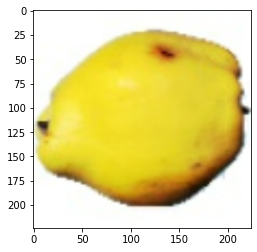

In [33]:
# view a sample validation image
print(le.inverse_transform(np.argmax(label, axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(224, 224, 3))

In [34]:
# evaluating the loaded model
loss, acc, prec, rec = model.evaluate(test_dataset)

print("Testing Acc: ", acc)
print("Testing Precision: ", prec)
print("Testing Recall: ", rec)

709/709 [==============================] - 94s 133ms/step - loss: 0.4200 - accuracy: 0.8920 - Precision: 0.9021 - Recall: 0.8819
Testing Acc:  0.8919693231582642
Testing Precision:  0.9021146297454834
Testing Recall:  0.8818758726119995


In [35]:
def LoadImage(image_path):
    image = tf.io.read_file(image_path)
    image = tf.io.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [224, 224], method="bilinear")
    plt.imshow(image.numpy()/255)
    image = tf.expand_dims(image, 0)
    return image

def RealtimePrediction(image_path, model, encoder_):
    image = LoadImage(image_path)
    prediction = model.predict(image)
    prediction = np.argmax(prediction, axis=1)
    return encoder_.inverse_transform(prediction)[0]

'Beetroot'

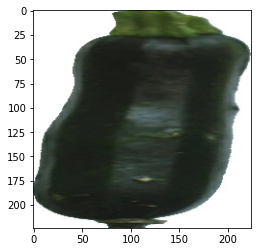

In [36]:
RealtimePrediction("/kaggle/input/fruits/fruits-360-original-size/fruits-360-original-size/Test/zucchini_dark_1/r0_107.jpg", model, le)